In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
rs = 2

# Load a dataset

In [3]:
# import a dataset
df = pd.read_csv("./task/training.csv")

# Exploratory Data Analysis (EDA)

In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
31,5.6,2.9,3.6,1.3,1
28,7.2,3.6,6.1,2.5,0
47,5.7,3.0,4.2,1.2,1
41,6.7,3.1,4.7,1.5,1
6,5.8,2.7,5.1,1.9,0


In [6]:
df.shape

(64, 5)

In [7]:
df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                 int64
dtype: object

In [8]:
df['target'].value_counts()

target
0    37
1    27
Name: count, dtype: int64

In [9]:
df.describe(exclude=['int64'])

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,64.000000,64.000000,64.000000,64.000000
mean,6.293750,2.906250,5.025000,1.746875
std,0.676094,0.303354,0.794825,0.433139
min,4.900000,2.200000,3.300000,1.000000
25%,5.700000,2.700000,4.475000,1.400000
50%,6.300000,2.950000,5.100000,1.800000
75%,6.700000,3.025000,5.600000,2.100000
max,7.900000,3.800000,6.700000,2.500000


In [10]:
pd.DataFrame(df.groupby(by=['target']).describe()).stack(future_stack=True).unstack(0)

sepal length (cm)            sepal width (cm)             \
target                 0          1                0          1   
count          37.000000  27.000000        37.000000  27.000000   
mean            6.545946   5.948148         2.989189   2.792593   
std             0.663574   0.532317         0.314275   0.251038   
min             4.900000   4.900000         2.200000   2.300000   
25%             6.100000   5.600000         2.800000   2.600000   
50%             6.500000   5.700000         3.000000   2.900000   
75%             6.900000   6.350000         3.200000   3.000000   
max             7.900000   7.000000         3.800000   3.200000   

       petal length (cm)            petal width (cm)             
target                 0          1                0          1  
count          37.000000  27.000000        37.000000  27.000000  
mean            5.559459   4.292593         2.051351   1.329630  
std             0.507970   0.458195         0.279505   0.183586  
min             4.500000   3.300000         1.400000   1.000000  
25%             5.100000   4.000000         1.900000   1.250000  
50%             5.600000   4.400000         2.000000   1.300000  
75%             5.900000   4.600000         2.300000   1.500000  
max             6.700000   5.100000         2.500000   1.700000

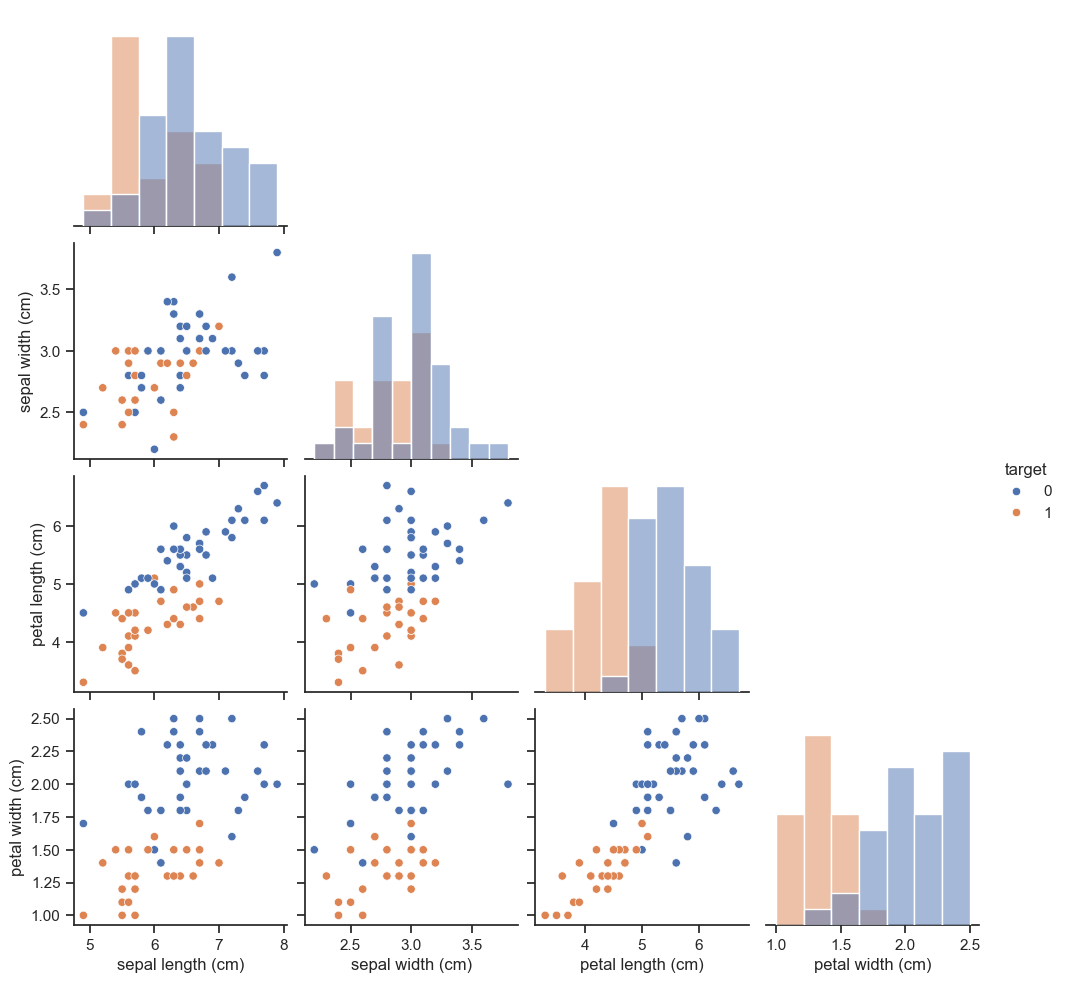

In [11]:
sns.set_theme(style="ticks")
sns.pairplot(df, corner=True, diag_kind="hist", hue="target")

# Training

### Training dataset

In [12]:
print(df.columns)

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')


In [13]:
X = df.iloc[:,2:4] #X = df.iloc[:,:-1] #X = df.iloc[:,2:4]
y = df.iloc[:,-1]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=rs)

In [15]:
X_train.shape

(51, 2)

In [16]:
X_train.sample(5)

,petal length (cm),petal width (cm)
41,4.7,1.5
25,5.1,1.6
62,5.1,2.0
17,5.7,2.1
34,6.6,2.1


In [17]:
y_train.value_counts()

target
0    29
1    22
Name: count, dtype: int64

In [18]:
X_test.shape

(13, 2)

In [19]:
y_test.value_counts()

target
0    8
1    5
Name: count, dtype: int64

### Perceptron learning

In [20]:
# initialization
model_per = Perceptron()
# optimization
model_per.fit(X_train, y_train)

Perceptron()

In [21]:
# training: performance
y_pred_train = model_per.predict(X_train)
print(metrics.accuracy_score(y_pred_train, y_train))

0.8823529411764706


In [22]:
# testing: performance
y_pred_test = model_per.predict(X_test)
print(metrics.accuracy_score(y_pred_test, y_test))

0.7692307692307693


### Visualization: Decision boundary

In [23]:
w = model_per.coef_[0]
#print(w)

In [24]:
w0 = model_per.intercept_
#print(w0)

In [25]:
idx_0 = y[y==0].index
idx_1 = y[y==1].index

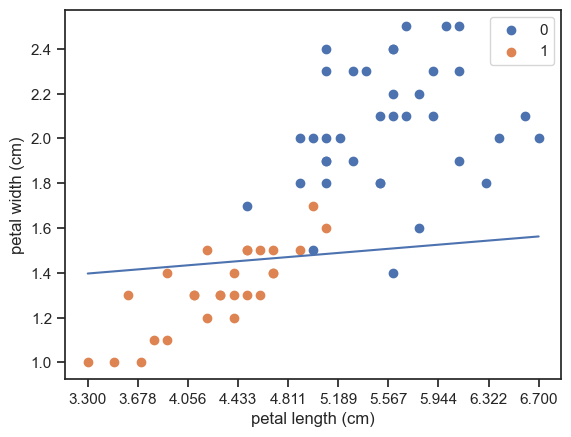

In [26]:
if len(w) == 2:
    x_ticks = np.linspace(min(X.iloc[:,0]),max(X.iloc[:,0]),10)
    ax = plt.subplot(1,1,1)
    ax.set_xticks(x_ticks)
    #ax.set_xlim(min(X.iloc[:,0]),max(X.iloc[:,0]))
    #ax.set_ylim(min(X.iloc[:,1]),max(X.iloc[:,1]))
    ax.set_xlabel(X.columns[0])
    ax.set_ylabel(X.columns[1])
    plt.scatter(X.iloc[idx_0,0],X.iloc[idx_0,1],label='0')
    plt.scatter(X.iloc[idx_1,0],X.iloc[idx_1,1],label='1')
    plt.plot(x_ticks, (w[0]*x_ticks + w0)/(-w[1]))
    plt.legend(loc = 'best')